## Libs import

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

## Ford Dataset

In [2]:
# loading data 
df = pd.read_csv('../input/used-car-dataset-ford-and-mercedes/ford.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [3]:
df.shape

(17965, 9)

## Cheking Na values

In [4]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

## Converting categorical columns to numericals

In [5]:
# this transformer will convert any giving categoricol column to numerical
def simple_transformer(column):
    # all unique values for column 
    names = column.value_counts().index
    # how size of them
    size = len(names)
    # create dict value:name / ex: {1:'Focus'}... 
    replacement = dict(zip(names, range(size)))
    # aplly the changes
    column.replace(replacement, inplace=True)
    return replacement

### Aplying the transformer only to this columns : Model, FuelType, Transmission 

### Model

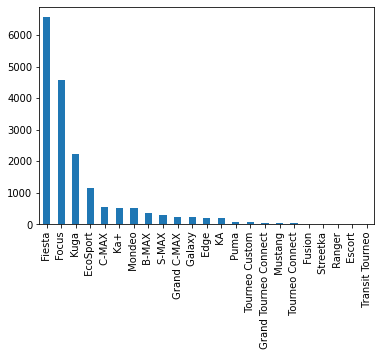

In [6]:
df['model'].value_counts().plot(kind='bar');

In [7]:
df['model'].head()

0     Fiesta
1      Focus
2      Focus
3     Fiesta
4     Fiesta
Name: model, dtype: object

In [8]:
simple_transformer(df['model'])

{' Fiesta': 0,
 ' Focus': 1,
 ' Kuga': 2,
 ' EcoSport': 3,
 ' C-MAX': 4,
 ' Ka+': 5,
 ' Mondeo': 6,
 ' B-MAX': 7,
 ' S-MAX': 8,
 ' Grand C-MAX': 9,
 ' Galaxy': 10,
 ' Edge': 11,
 ' KA': 12,
 ' Puma': 13,
 ' Tourneo Custom': 14,
 ' Grand Tourneo Connect': 15,
 ' Mustang': 16,
 ' Tourneo Connect': 17,
 ' Fusion': 18,
 ' Streetka': 19,
 ' Ranger': 20,
 ' Escort': 21,
 ' Transit Tourneo': 22}

In [9]:
df['model'].head()

0    0
1    1
2    1
3    0
4    0
Name: model, dtype: int64

### Year

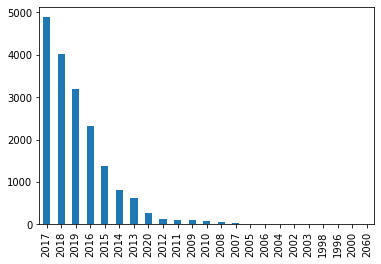

In [10]:
df['year'].value_counts().plot(kind='bar');

## Transmission

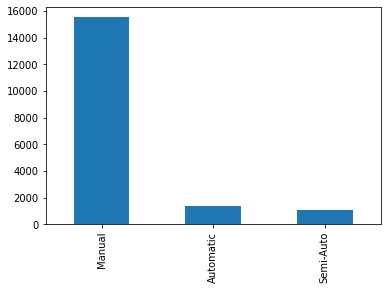

In [11]:
df['transmission'].value_counts().plot(kind='bar');

In [12]:
df['transmission'].head()

0    Automatic
1       Manual
2       Manual
3       Manual
4    Automatic
Name: transmission, dtype: object

In [13]:
simple_transformer(df['transmission'])

{'Manual': 0, 'Automatic': 1, 'Semi-Auto': 2}

In [14]:
df['transmission'].head()

0    1
1    0
2    0
3    0
4    1
Name: transmission, dtype: int64

### FuelType

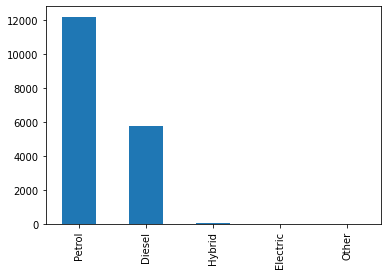

In [15]:
df['fuelType'].value_counts().plot(kind='bar');

In [16]:
df['fuelType'].head()

0    Petrol
1    Petrol
2    Petrol
3    Petrol
4    Petrol
Name: fuelType, dtype: object

In [17]:
simple_transformer(df['fuelType'])

{'Petrol': 0, 'Diesel': 1, 'Hybrid': 2, 'Electric': 3, 'Other': 4}

In [18]:
df['fuelType'].head()

0    0
1    0
2    0
3    0
4    0
Name: fuelType, dtype: int64

## Feauters / Target

In [19]:
X = df.drop('price', axis=1)
X.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,0,2017,1,15944,0,150,57.7,1.0
1,1,2018,0,9083,0,150,57.7,1.0
2,1,2017,0,12456,0,150,57.7,1.0
3,0,2019,0,10460,0,145,40.3,1.5
4,0,2019,1,1482,0,145,48.7,1.0


In [20]:
y = df.price
y.head()

0    12000
1    14000
2    13000
3    17500
4    16500
Name: price, dtype: int64

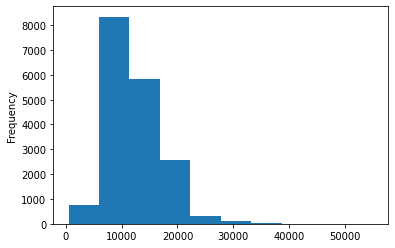

In [21]:
y.plot.hist();

## Modeling

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=33) 
clf = RandomForestRegressor()
clf.fit(X_train, y_train)
base_accuracy = clf.score(X_test, y_test)
base_accuracy

0.9354336316913969

In [23]:
y_pred = clf.predict(X_test)
RMSE = np.sqrt(mean_squared_error(y_test, y_pred)) 
print('RMSE Value = ', RMSE)

RMSE Value =  1214.4802567438894


## Corr

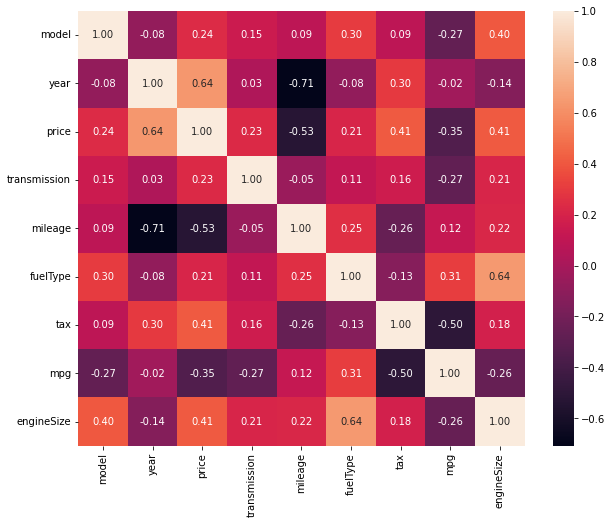

In [24]:
corr = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', ax=ax);

## Feauter importance

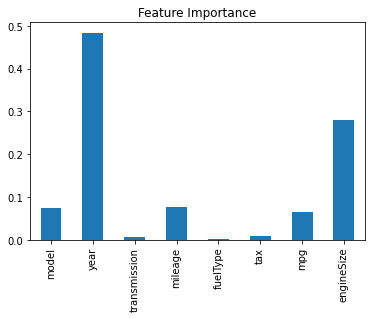

In [25]:
f_dict = dict(zip(X.columns , list(clf.feature_importances_)))
f_data = pd.DataFrame(f_dict, index=[0])
f_data.T.plot.bar(title="Feature Importance", legend=False);

## GridSearcheCV

In [26]:

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
rf = RandomForestRegressor(random_state=33)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   38.3s


[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=100, total=   1.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=200, total=   2.4s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=8, n_estimators=300, total=   3.7s
[CV] bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   1.2s
[CV] bootstrap=True, max_depth=80, max_features=2, min_sam

[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.1min



[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=100, total=   1.6s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=200, total=   2.9s
[CV] bootstrap=True, max_depth=80, max_features=3, 

[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  7.4min



[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=10, n_estimators=1000, total=  14.2s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000, total=  13.8s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=300, total=   4.1s
[CV] bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000 
[CV]  bootstrap=True, max_depth=80, max_features=3, min_samples_leaf=4, min_samples_split=8, n_estimators=1000, total=  14.1s
[CV] bootstrap=True, max_depth=80, max_features=3

[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 13.5min



[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=100, total=   1.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200, total=   2.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=4, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_fe

[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 18.3min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=33), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [27]:
best_grid = grid_search.best_estimator_
print('best grid = ', best_grid)
grid_accuracy = grid_search.score(X_test, y_test)
print('Grid Score = ', grid_accuracy)
y_pred = grid_search.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_test, y_pred)) 
print('Grid RMSE Value = ', RMSE)

best grid =  RandomForestRegressor(max_depth=80, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000, random_state=33)
Grid Score =  0.9438016558978257
Grid RMSE Value =  1133.0499059450583
